# √âtude de quelques modulations
<!-- vincent.mazet@unistra.fr, 03/2022 -->

Dans ce TP, on veut √©tudier les propri√©t√©s et les effets des modulations num√©riques.
Comme ce sont des signaux analogiques et al√©atoires, on effectue les calculs en utilisant les outils du traitement statistique du signal.
Pour √©viter des calculs fastidieux, on va utiliser les outils num√©riques sur des signaux simul√©s.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Utilisation du module comnumfip

Le module `comnumfip` regroupe de fonctions particuli√®res pour faire les TP.
Il s'agit d'un unique fichier t√©l√©chargeable sur :
https://github.com/vincmazet/comnumfip.
Une fois le fichier t√©l√©charg√©, il suffit de l'ajouter dans le dossier contenant le notebook.

L'aide des fonctions de ce module est accessible directement sur la page web du module, ou bien en utilisant l'instruction `help(fonction)`. Par exemple :

In [2]:
import comnumfip as cnf
help(cnf.randmary)

Help on function randmary in module comnumfip:

randmary(N, p)
    G√©n√©ration d'une s√©quence M-aire.
    
    Entr√©es :
    N (scalar) : taille de la s√©quence (nombre de symboles)
    P (array)  : probabilit√© des symboles (sa taille correspond √† la taille de l'alphabet)
    
    Sortie :
    c (array) : s√©quence al√©atoire M-aire o√π M = len(P).
    
    Exemples :
    
    # s√©quence binaire de taille 1000, symboles √©quiprobables :
    c1 = randmary(1000,[0.5, 0.5])
    
    # s√©quence binaire de taille 100, p("0") = 0.3, p("1") = 0.7 :
    c2 = randmary(100,[0.3, 0.7])
    
    # s√©quence 4-aire de taille 10, symboles √©quiprobables :
    c3 = randmary(10,np.ones(4)/4)



## Code principal

La fonction `randmary` produit une s√©quence M-aire, et la fonction `bin2mary` permet de convertir une s√©quence binaire en s√©quence M-aire.

In [3]:
# Nombre de bits dans la s√©quence binaire
N = 1000

# S√©quence binaire (avec probabilit√© √©gale des bits 0 et 1)
m2 = cnf.randmary(N,[.5, .5])

# Conversion en s√©quence hexad√©cimale
m16 = cnf.bin2mary(m2,16)

# Affichage
print(f"S√©quence binaire :      {m2[:16]}\b ...]")
print(f"S√©quence hecad√©cimale : {m16[:4]}\b ...]")
print(f"Attention : LSB (low significant bit) √† gauche !")

S√©quence binaire :      [1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 ...]
S√©quence hecad√©cimale : [ 7 15  2  0 ...]
Attention : LSB (low significant bit) √† gauche !


√Ä partir des s√©quences binaires et hexad√©cimale cr√©√©es, qui repr√©sentent toutes les deux le m√™me message, on repr√©sente diff√©rentes modulations (seuls les premiers symboles son repr√©sent√©s) et leur p√©riodogramme :

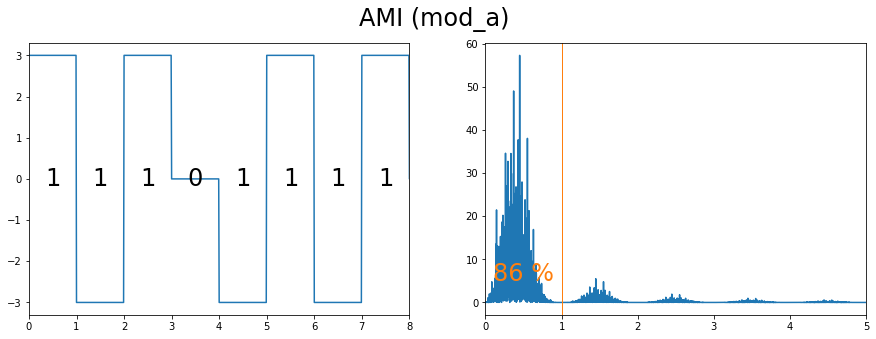

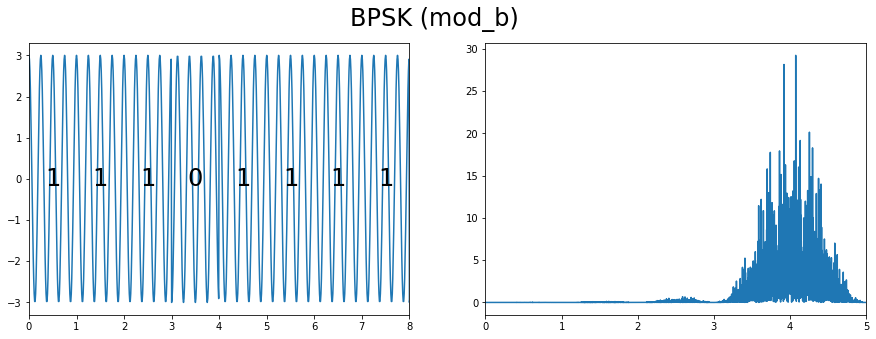

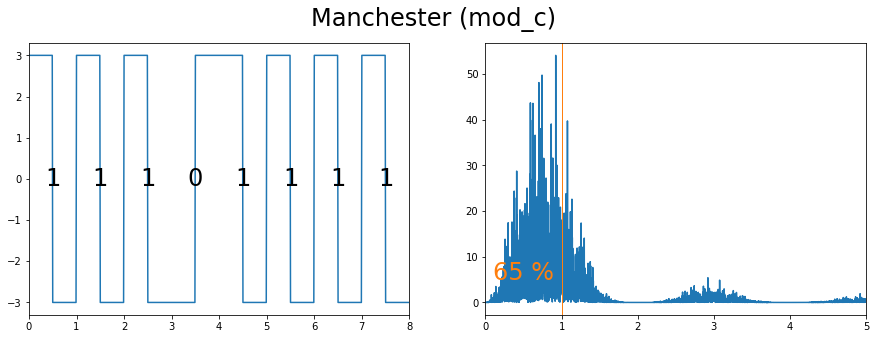

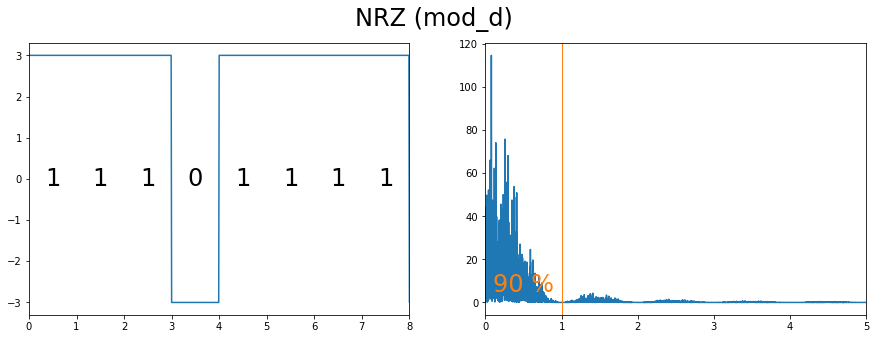

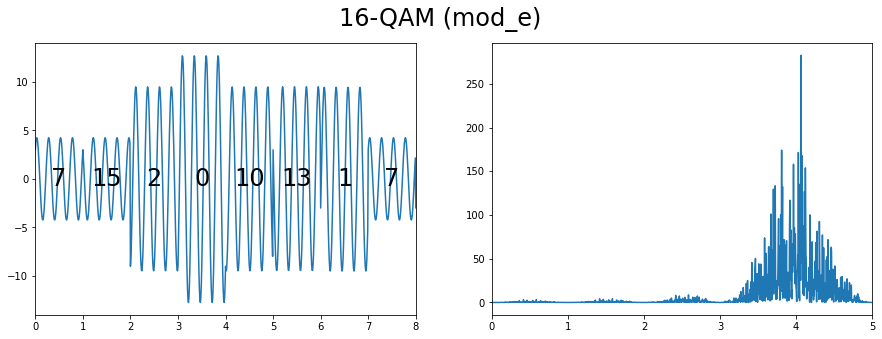

In [4]:
# Modulations √† √©tudier
modulations = {
    "AMI":         cnf.mod_a,
    "BPSK":        cnf.mod_b,
    "Manchester":  cnf.mod_c,
    "NRZ":         cnf.mod_d,
    "16-QAM":      cnf.mod_e,
}

# Amplitude et dur√©e d'un bit
V, T = 3, 1

# Taille de la s√©quence √† afficher
K = 8

# Affichage
for name in modulations:
    
    m = m2 if name != "16-QAM" else m16
    
    # Modulation
    mod = modulations[name]
    t, x = mod(m, V, T)
    
    # Fen√™tre
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle(f"{name} ({mod.__name__})", fontsize=24)
    tm, fr = ax
    
    # Signal temporel
    tm.plot(t,x)
    tm.set_xlim([0, K*T])
    
    # Texte
    mid = (x.max()+x.min())/2
    for n in range(K):
        tm.text(n*T+T/2, mid, m[n], fontsize=24, ha="center", va="center")
    
    # Densit√© spectrale de puissance
    f, Pxx = signal.periodogram(x, 100/T)
    fr.plot(f, Pxx)
    fr.set_xlim([0, 5])

    # Fraction d'√©nergie
    if name in ["AMI", "Manchester", "NRZ"]:
        f0 = 1
        frac = np.sum(Pxx[f<f0]) / np.sum(Pxx)
        fr.axvline(f0, color="tab:orange", linewidth="1")
        fr.text(f0/2, 5, f"{100*frac:.0f} %", color="tab:orange", ha="center", fontsize=24)

Ce tableau compare les diff√©rentes modulations en bande de base sur diff√©rents crit√®res :

|                              | NRZ | Manchester | AMI |
| ---------------------------- | --- | ---------- | --- |
|¬†Largeur de bande             |¬†üòÄ  | üòñ         |¬†üòÄ  |¬†
|¬†Simplicit√© de mise en ≈ìuvre  |¬†üòÄ  | üòï         |¬†üòï  |
|¬†Robustesse au bruit          |¬†üôÇ  | üôÇ         |¬†üòñ  |
|¬†Synchronisation du r√©cepteur |¬†üòñ  | üòÄ         |¬†üòñ  |
|¬†T√©l√©alimentation possible    |¬†üòñ  | üòÄ         |¬†üòÄ  |
|¬†Inversion de la polarit√©     | üòñ  | üòñ         | üòÄ  |
|¬†D√©tection d'interruption     |¬†üòÄ  | üòÄ         |¬†üòï  |
  
<!--  
 - largeur de sa plage de fr√©quences : la plus √©troite possible
  - t√©l√©alimentation : peu de puissance aux faibles fr√©quences, aucune √† la fr√©quence nulle
  - codage de l'horloge : fr√©quence suffisante des transitions + synchronisation de l'horloge du r√©cepteur sur le signal re√ßu
  - r√©sistance au bruit : espacement des niveaux
  - complexit√© du codage : co√ªt et vitesse de codage
  - d√©pendance √† la polarit√© : facilit√© d'installation (Manchester?, AMI, NRZI)
  - √©quilibrage :
      mesure approximative de l'influence du codage sur des symboles successifs
      Running Digital Sequence : RDS({ak}) = \sum_k ak .
      DRDS({ak}) = max(abs{RDS({aj}) tel que {aj} sous-suite valide de {ak}}).
  - les transmissions en bande de base ont le grand int√©r√™t d'√™tre simples √† mettre en place
    et sont donc utilis√©es dans de nombreux domaines o√π les communications se font sur de courtes distances.
-->

Selon les r√©sultats de cet exercice, on peut en conclure les modulations adapt√©es pour les applications suivantes :

* Bus informatique ou de terrain : modulation en bande de base
  (I2C : NRZ,
  SATA : 8b/10b encoding,
  ASI : Manchester,
  KNX : sorte de Manchester,
  HART : FSK binaire superpos√© au 4-20 mA)
  
* liaison Wi-Fi : modulation sur porteuse
  (QAM, PSK, ou autre suivant la version de la norme)

* p√©riph√©rique USB et ordinateur : modulation en bande de base
  (NRZI)

* t√©l√©phone mobile et antenne relais : modulation sur porteuse
  (GSM = 900 MHz et 1800 MHz, avec variantes)